In [359]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

options(repr.plot.width = 15.0, repr.plot.height = 10)

[1] "college-placement"

# **Import**

In [360]:
library(ggplot2)
library(dplyr)
library(psych)
library(ggcorrplot)

# **1. Data Import & Structure**

In [361]:
data <- read.csv('/kaggle/input/college-placement/placement-dataset.csv')

* **city : City of student**
* **cgpa : Cumulative Grade Point Average (CGPA)**
* **iq: Intelligence Quotient (IQ)**
* **placement : placed or not**

In [362]:
str(data)

'data.frame':	100 obs. of  4 variables:
 $ city     : chr  "New York" "Los Angeles" "Chicago" "New York" ...
 $ cgpa     : num  6.8 5.9 NA 7.4 5.8 7.1 5.7 5 6.1 5.1 ...
 $ iq       : int  123 106 121 132 142 48 NA 63 156 66 ...
 $ placement: int  1 0 0 1 0 1 0 0 0 0 ...


In [363]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
city*,1,100,2.010000,0.8225975,2,2.012500,1.48260,1.0,3.0,2.0,-0.01814150,-1.5367231,0.08225975
cgpa,2,92,5.965217,1.1649114,6,5.958108,1.33434,3.3,8.5,5.2,0.05820948,-0.7256644,0.12145041
iq,3,96,117.916667,46.9135076,122,119.641026,40.03020,1.0,233.0,232.0,-0.38351706,0.2687075,4.78808982
placement,4,100,0.460000,0.5009083,0,0.450000,0.00000,0.0,1.0,1.0,0.15811278,-1.9946478,0.05009083


In [364]:
summary(data)

     city                cgpa             iq          placement   
 Length:100         Min.   :3.300   Min.   :  1.0   Min.   :0.00  
 Class :character   1st Qu.:5.000   1st Qu.: 90.0   1st Qu.:0.00  
 Mode  :character   Median :6.000   Median :122.0   Median :0.00  
                    Mean   :5.965   Mean   :117.9   Mean   :0.46  
                    3rd Qu.:6.825   3rd Qu.:146.8   3rd Qu.:1.00  
                    Max.   :8.500   Max.   :233.0   Max.   :1.00  
                    NA's   :8       NA's   :4                     

**Missing Value Check**

In [365]:
colSums(is.na(data))

city      cgpa        iq placement 
        0         8         4         0

**Duplicated Value Check**

In [366]:
table(duplicated(data))


FALSE  TRUE 
   99     1 

**Data Check**

In [367]:
head(data)

,city,cgpa,iq,placement
,<chr>,<dbl>,<int>,<int>
1,New York,6.8,123,1
2,Los Angeles,5.9,106,0
3,Chicago,NA,121,0
4,New York,7.4,132,1
5,Los Angeles,5.8,142,0
6,Chicago,7.1,48,1


# **2. Data Transform**

In [368]:
# Replace NA value with median

data$cgpa[is.na(data$cgpa) == T] <- median(data$cgpa, na.rm=T)
data$iq[is.na(data$iq) == T] <- median(data$iq, na.rm=T)

In [369]:
data$placement <- as.factor(data$placement)

In [370]:
# Remove duplicated value
data <- unique(data)

**Data Check**

In [371]:
colSums(is.na(data))

city      cgpa        iq placement 
        0         0         0         0

In [372]:
table(duplicated(data))


FALSE 
   99 

In [373]:
head(data)

,city,cgpa,iq,placement
,<chr>,<dbl>,<dbl>,<fct>
1,New York,6.8,123,1
2,Los Angeles,5.9,106,0
3,Chicago,6.0,121,0
4,New York,7.4,132,1
5,Los Angeles,5.8,142,0
6,Chicago,7.1,48,1


# **3. Data Visualization**

In [374]:
num_cols <- c('cgpa','iq')

**Histogram**

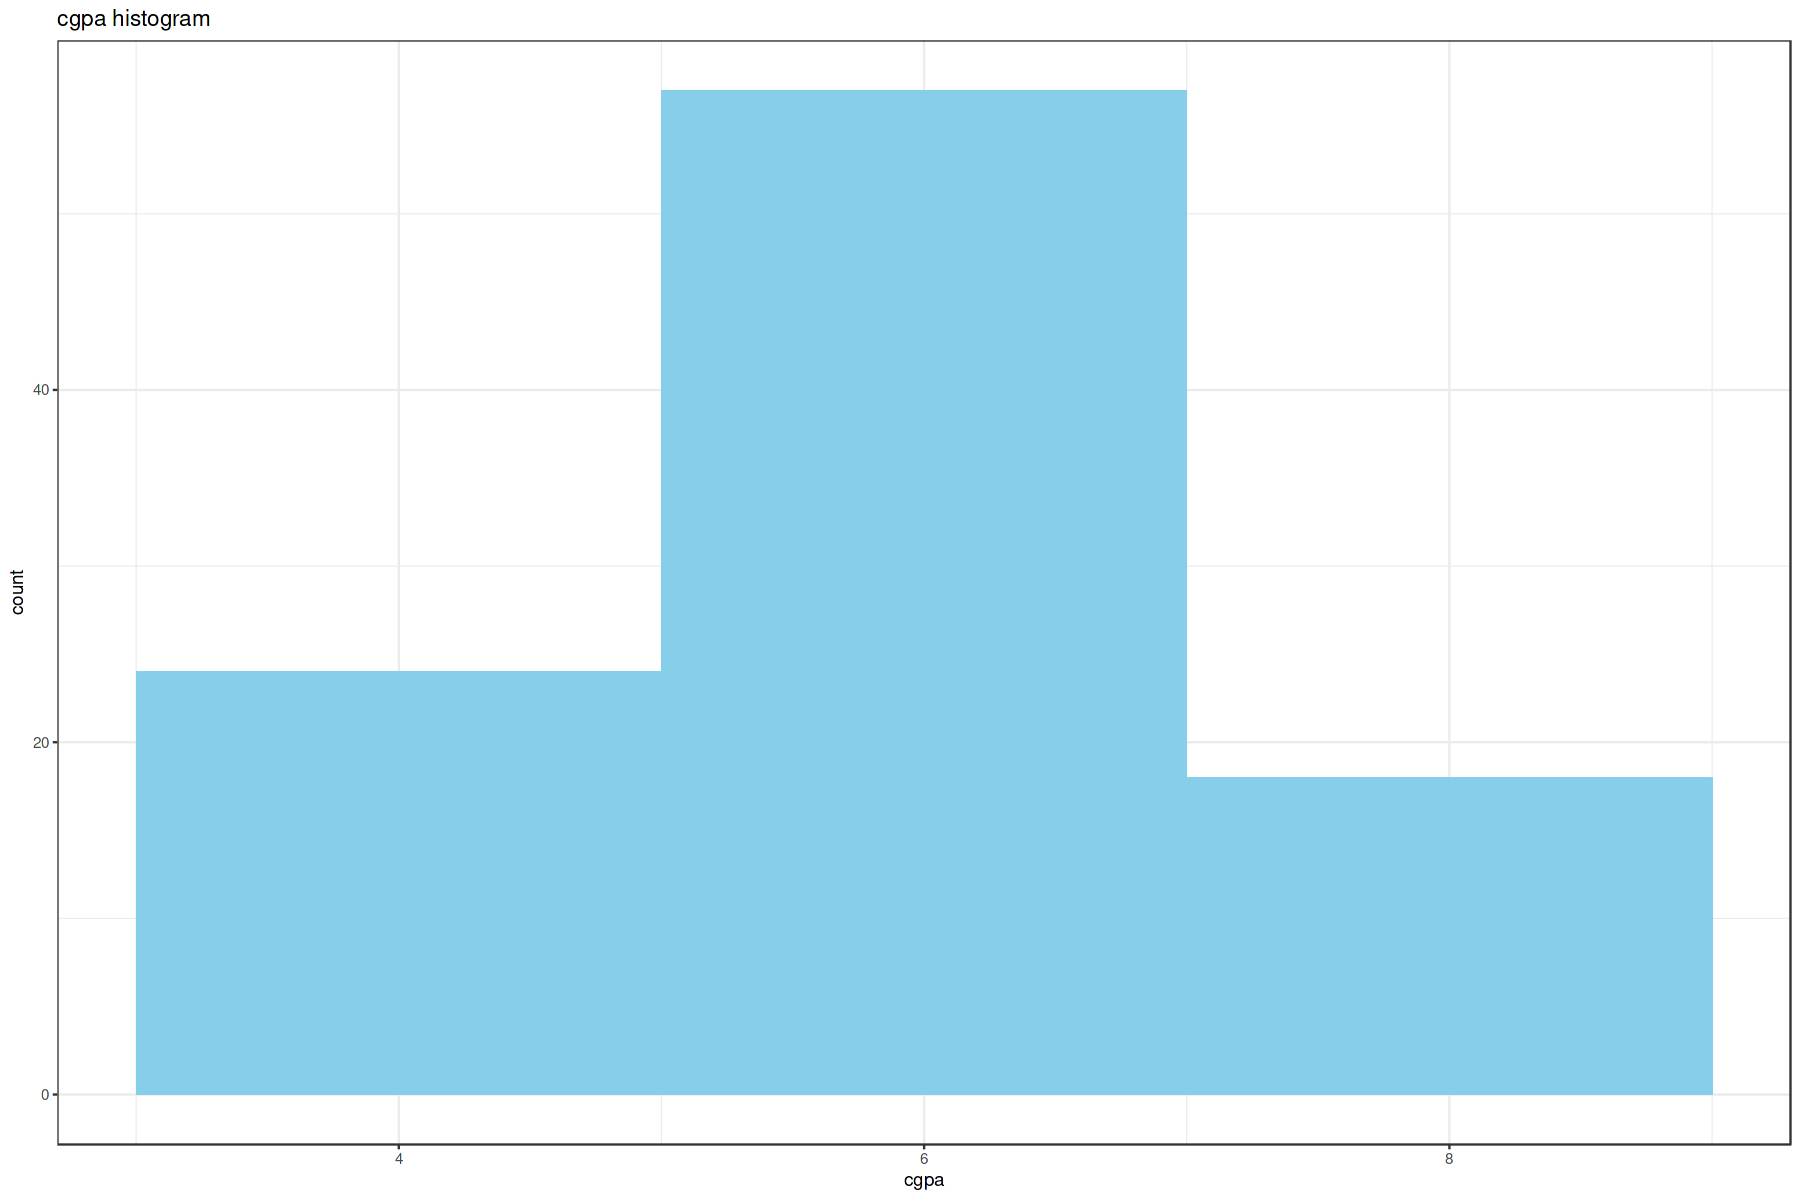

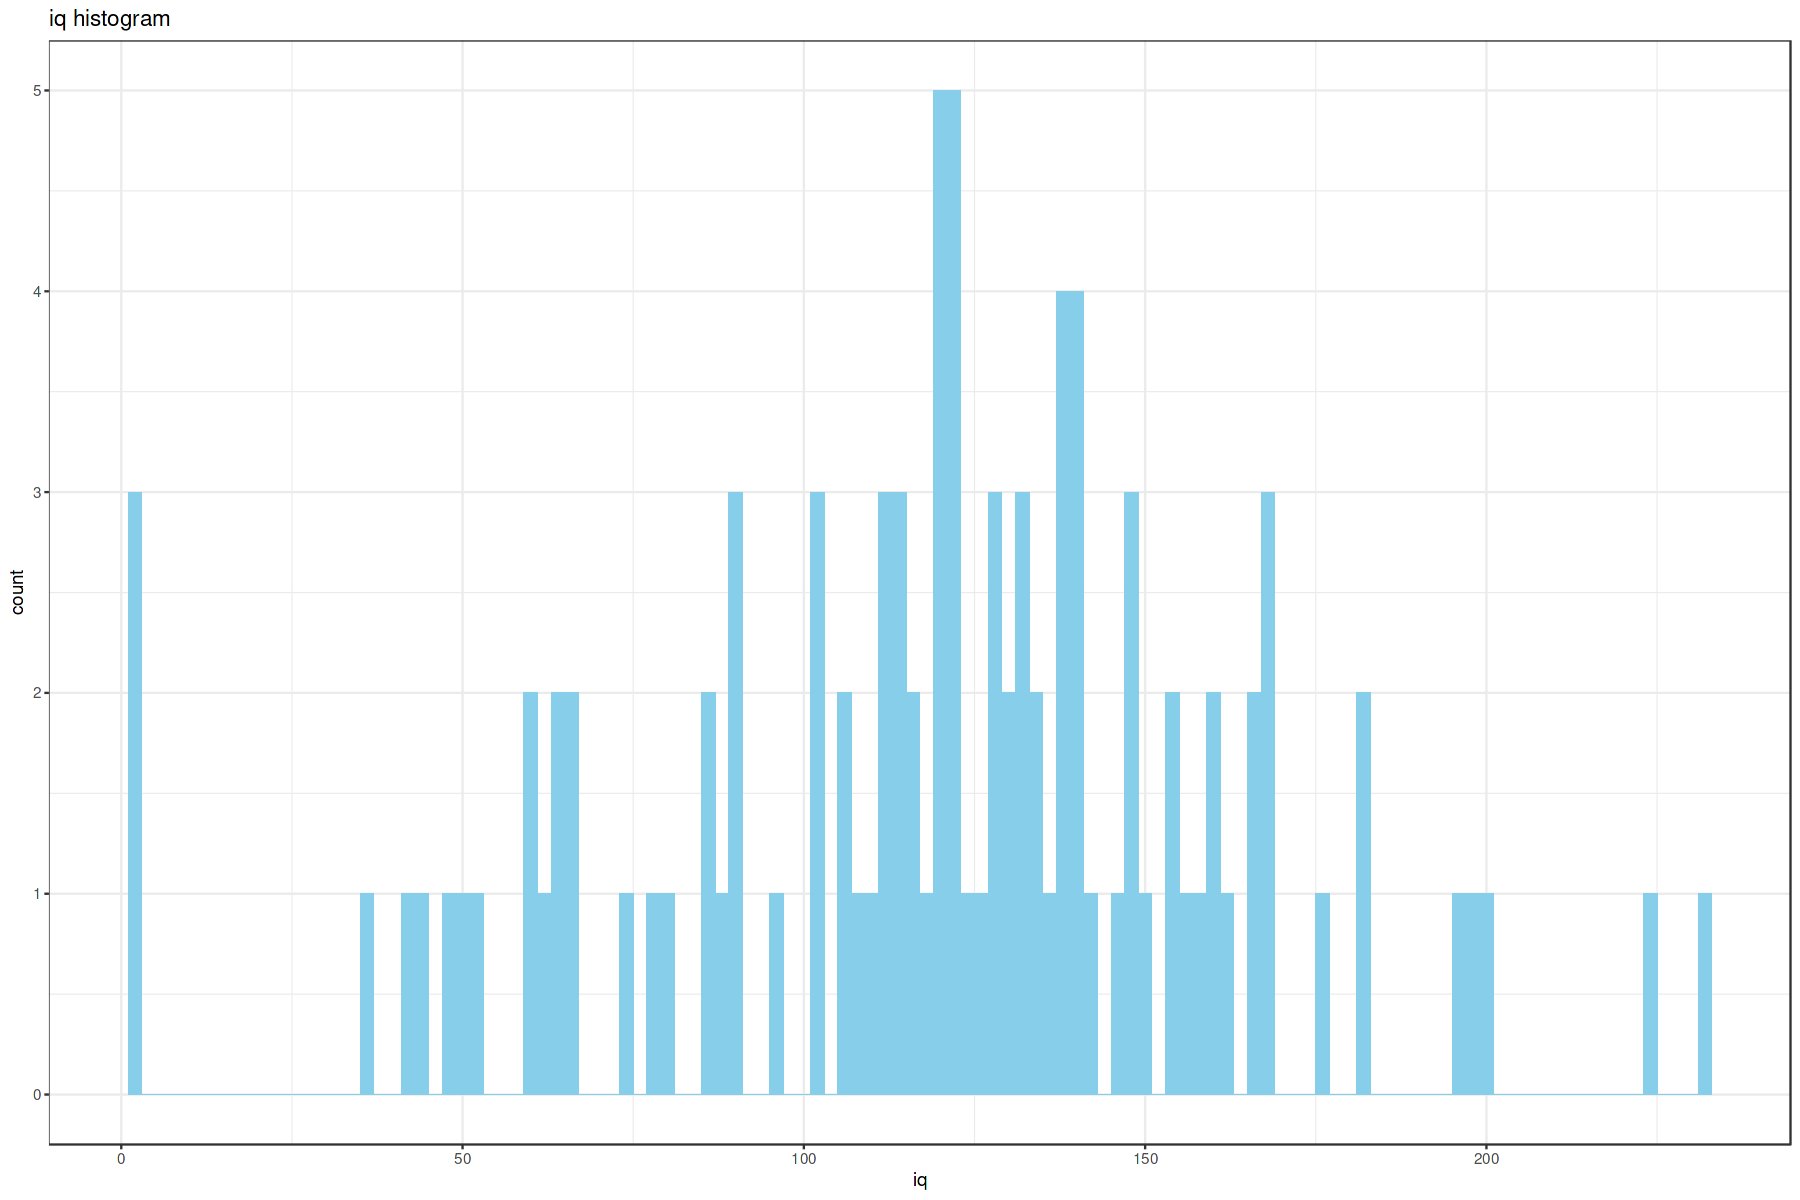

In [375]:
for (i in num_cols){
    print(ggplot(data, aes(x= data[,i])) + geom_histogram(fill = 'skyblue', binwidth = 2) + xlab(i) + theme_bw() + ggtitle(paste0(i, ' histogram')))
}

**Boxplot**

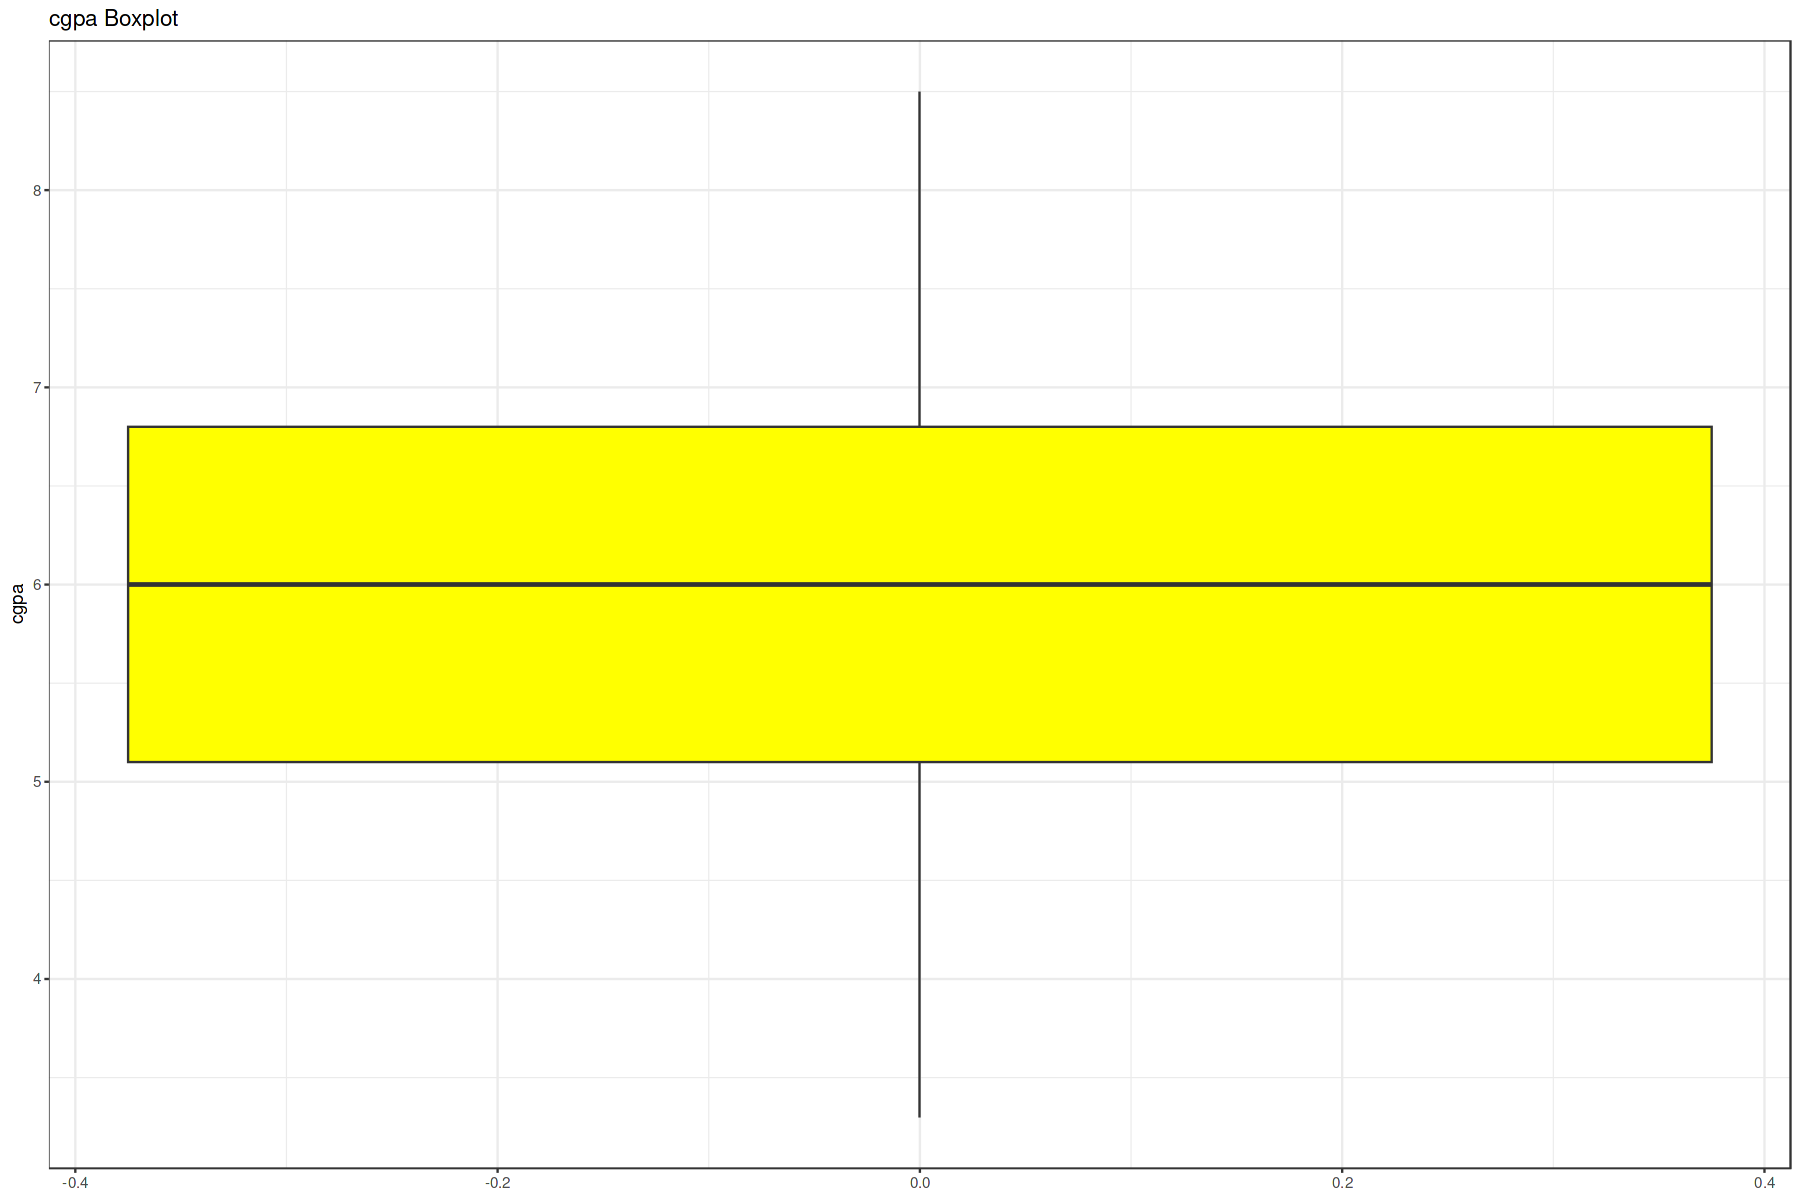

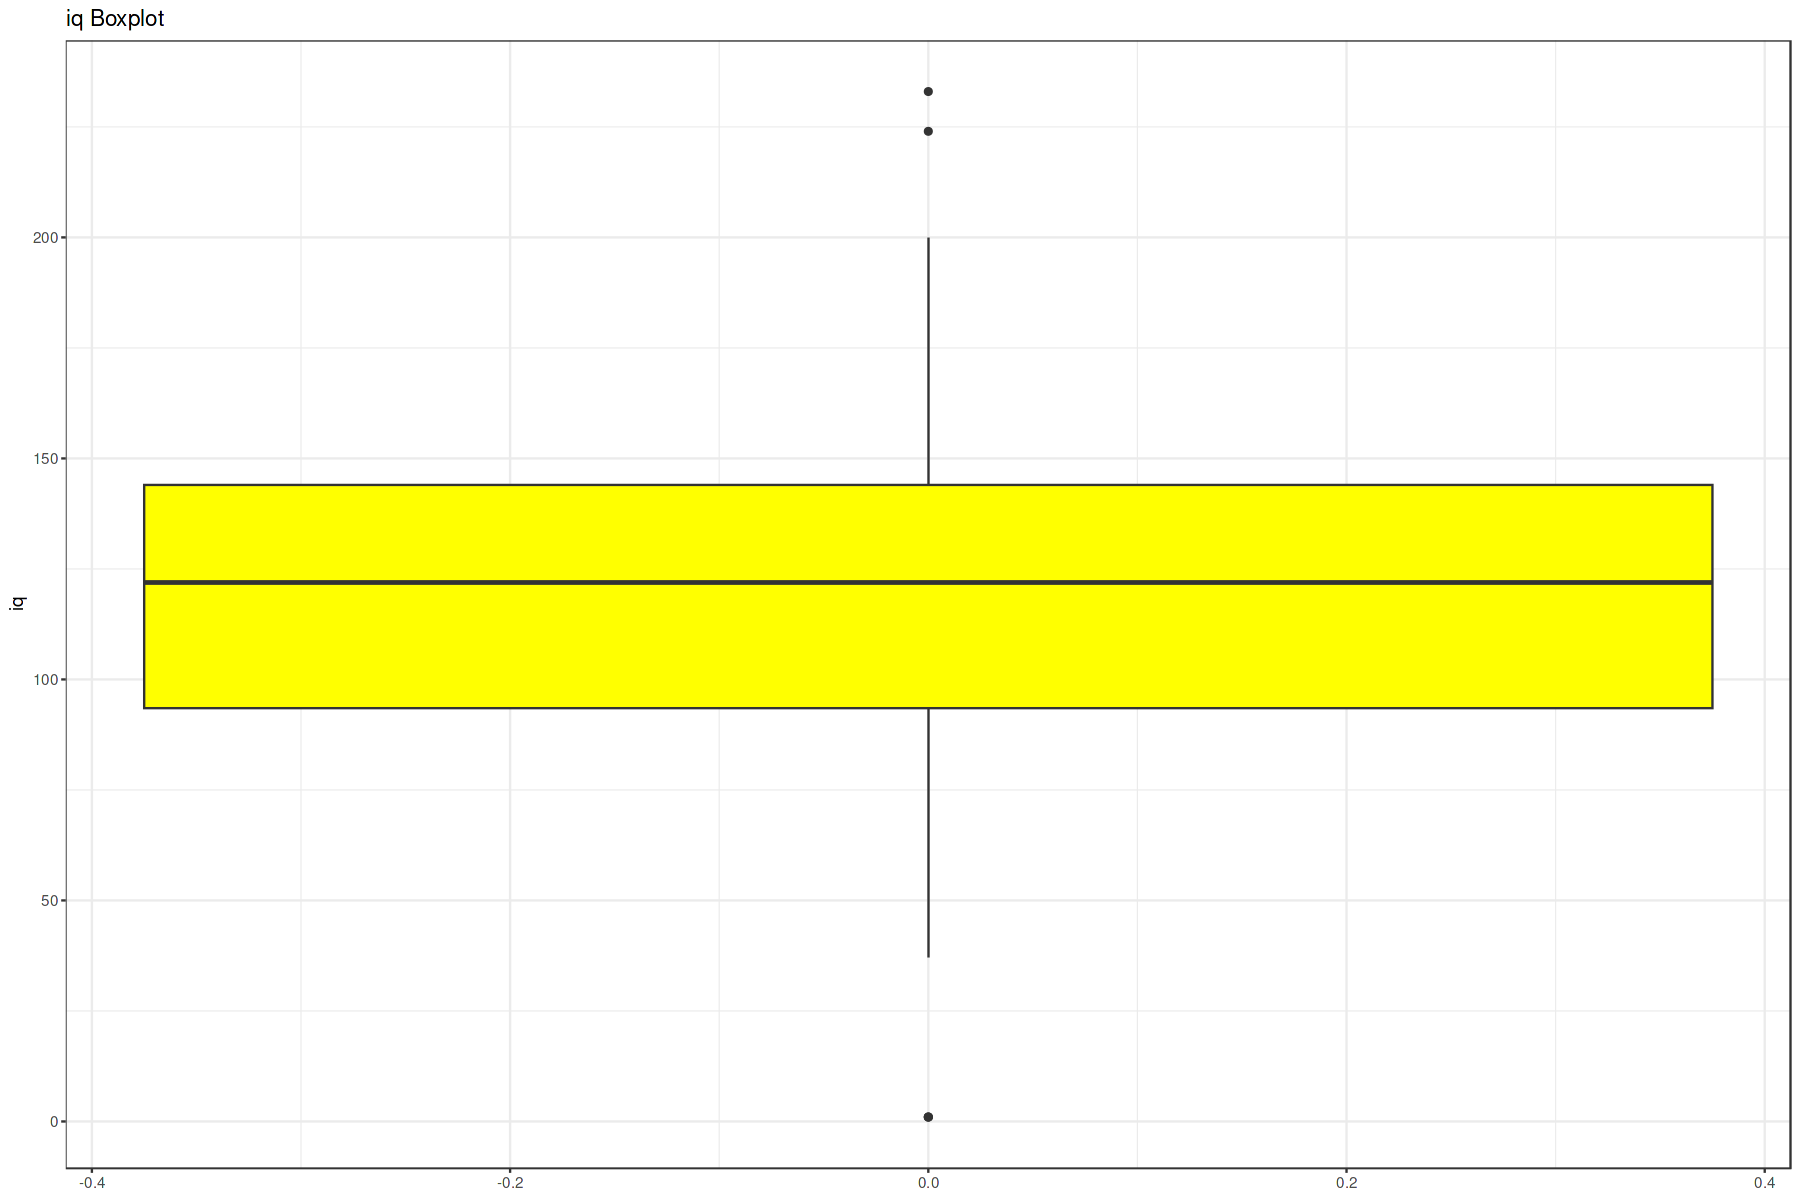

In [376]:
for (i in num_cols){
    print(ggplot(data, aes(y= data[,i])) + geom_boxplot(fill = 'yellow') + ylab(i) + theme_bw() + ggtitle(paste0(i, ' Boxplot')))
}

-------------------

**Boxplot by placement**

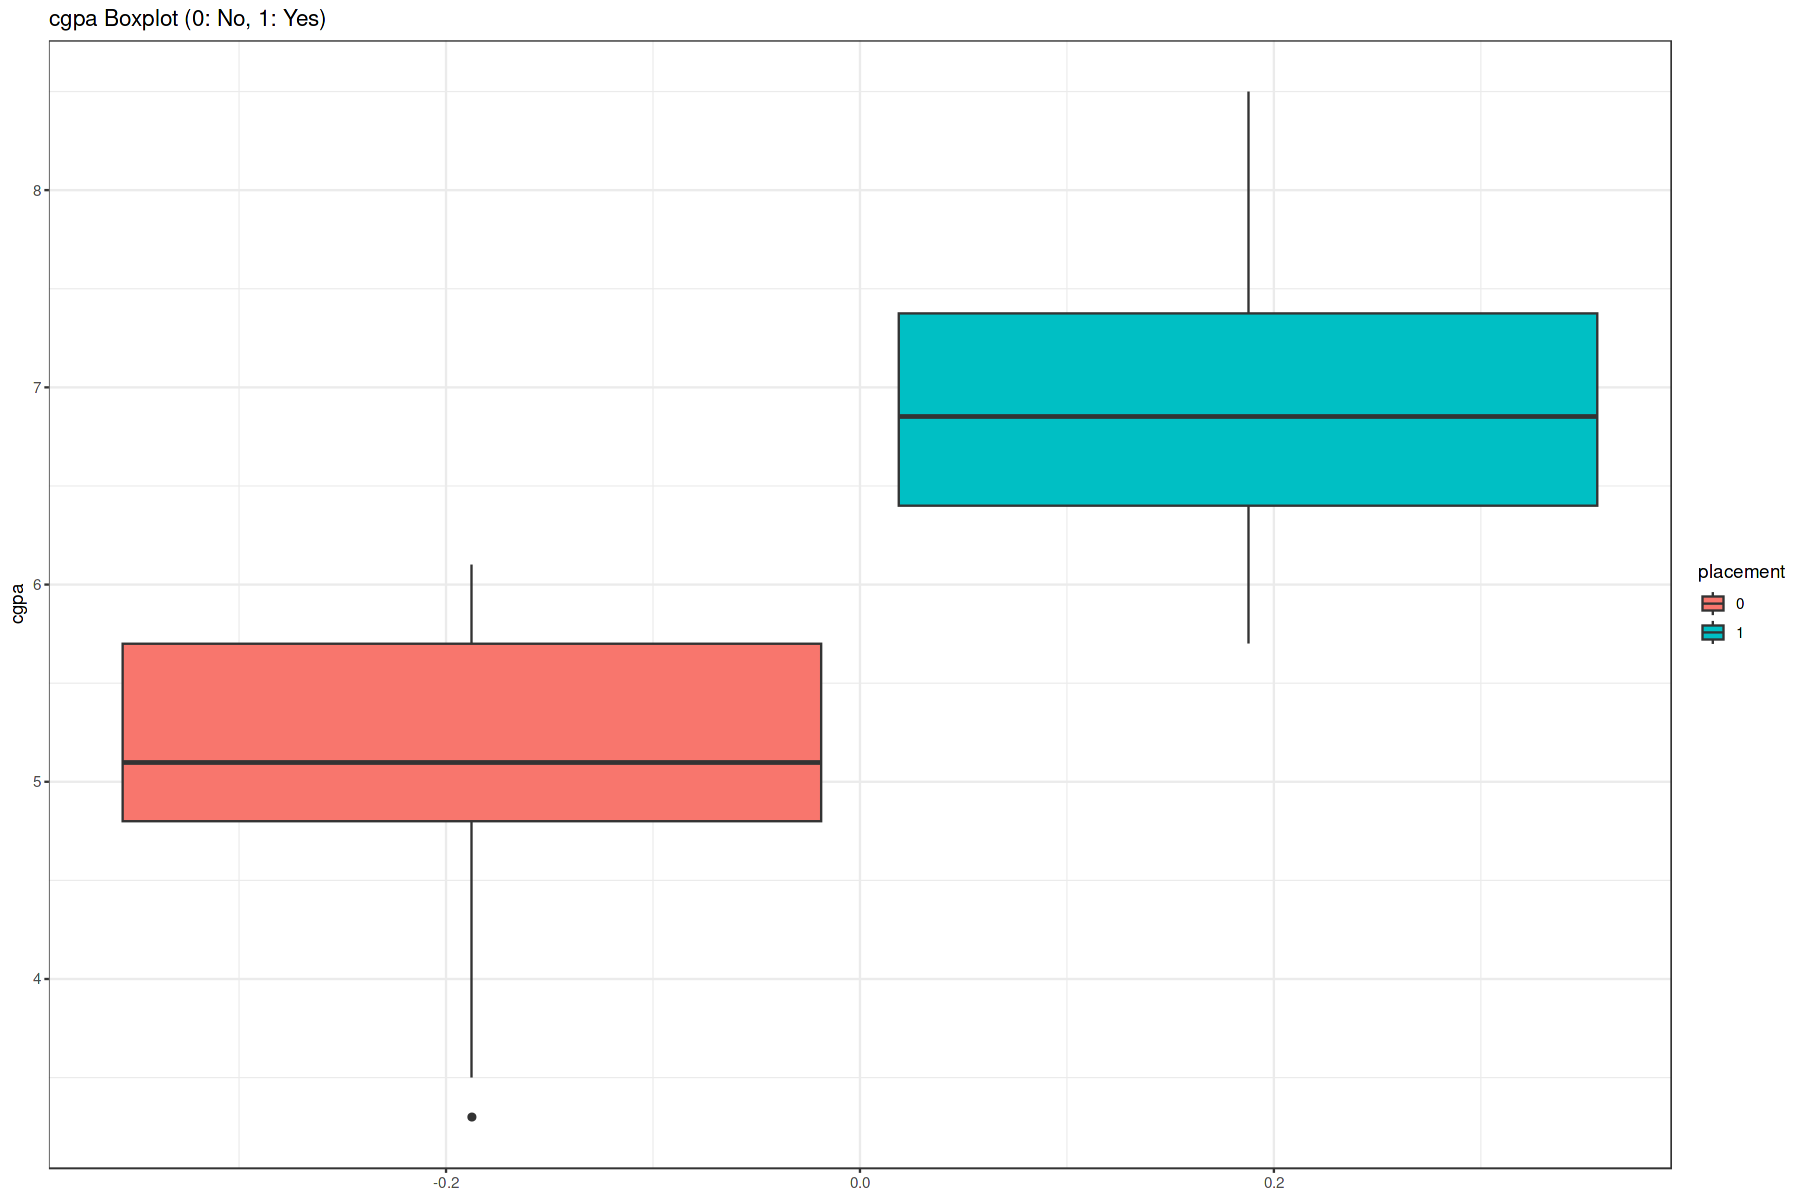

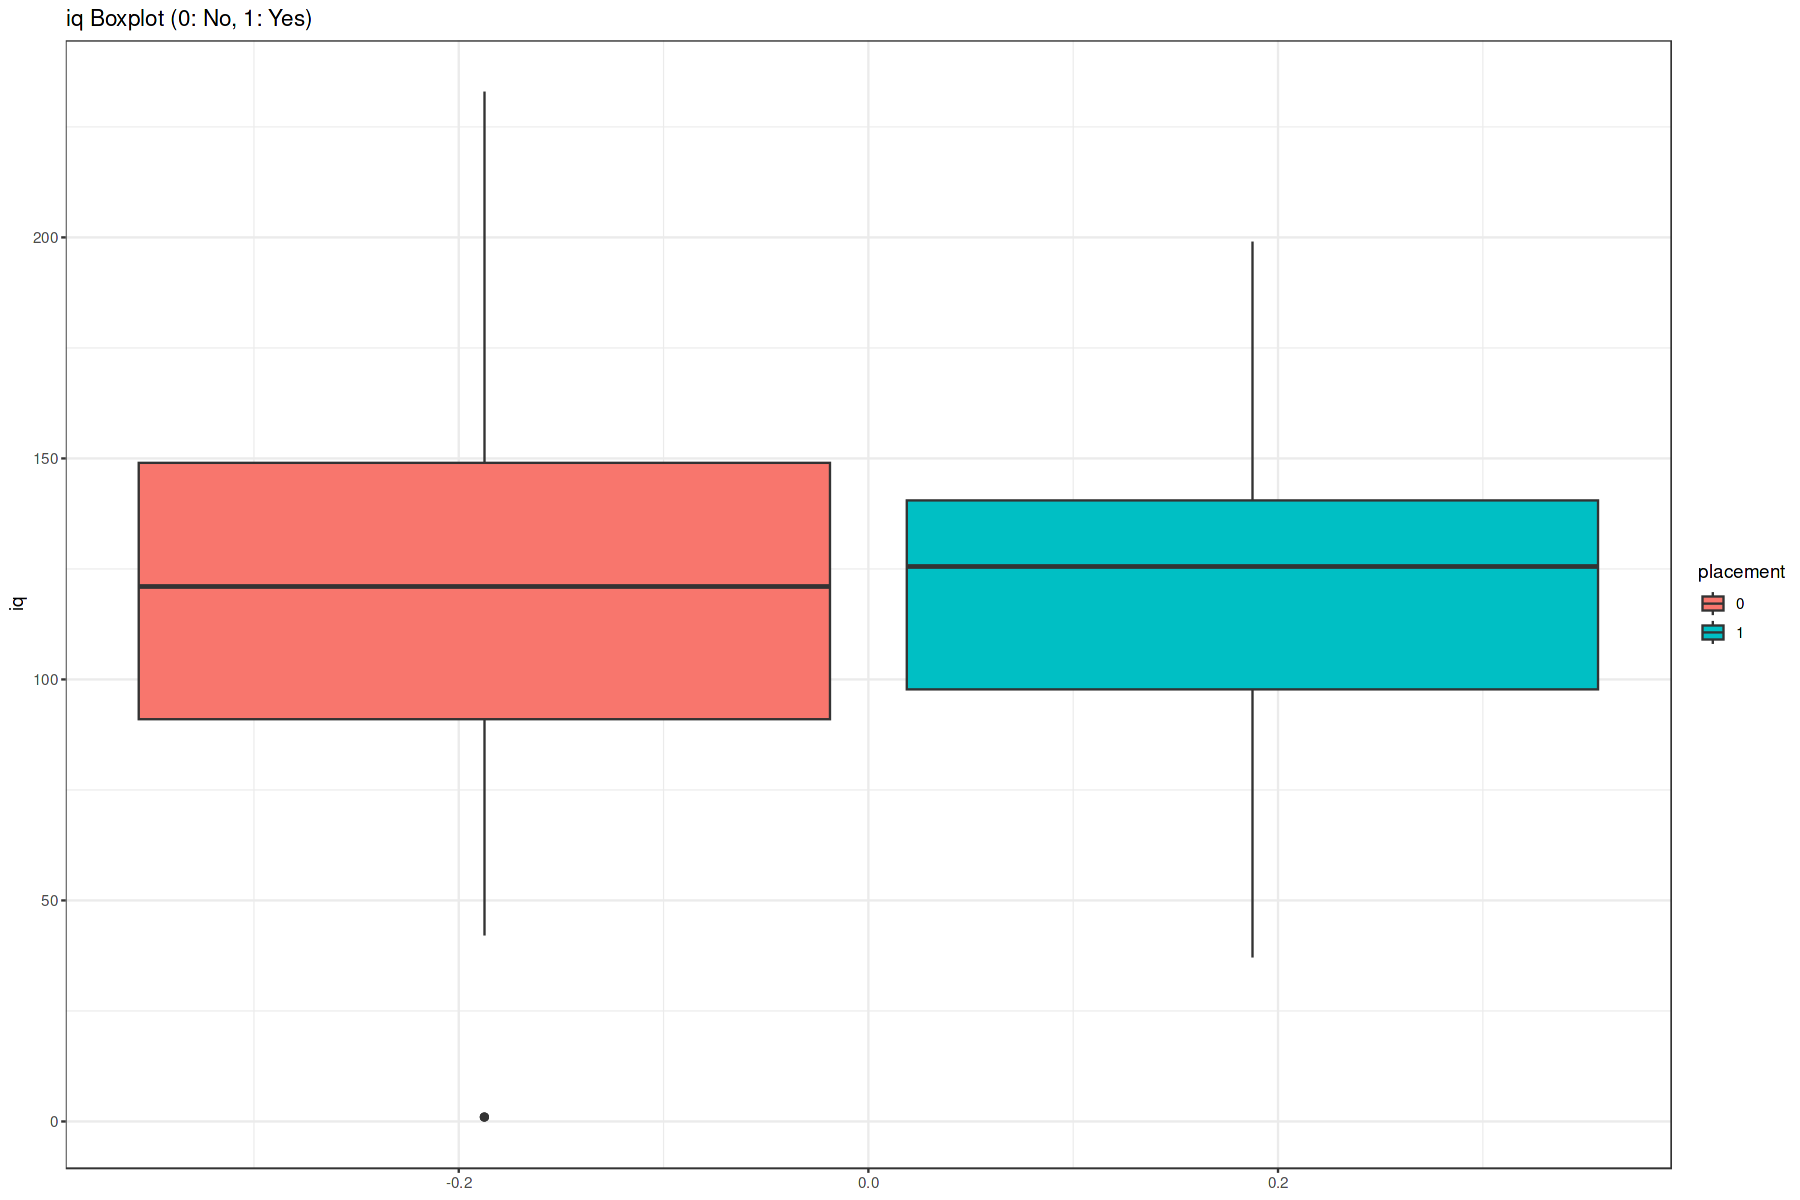

In [377]:
for (i in num_cols){
    print(ggplot(data, aes(y= data[,i], fill = factor(placement)))  + geom_boxplot()+ ylab(i) + theme_bw() +
          ggtitle(paste0(i, ' Boxplot (0: No, 1: Yes)')) + labs(fill = 'placement'))
}

---------------

**Number of Sample by City**

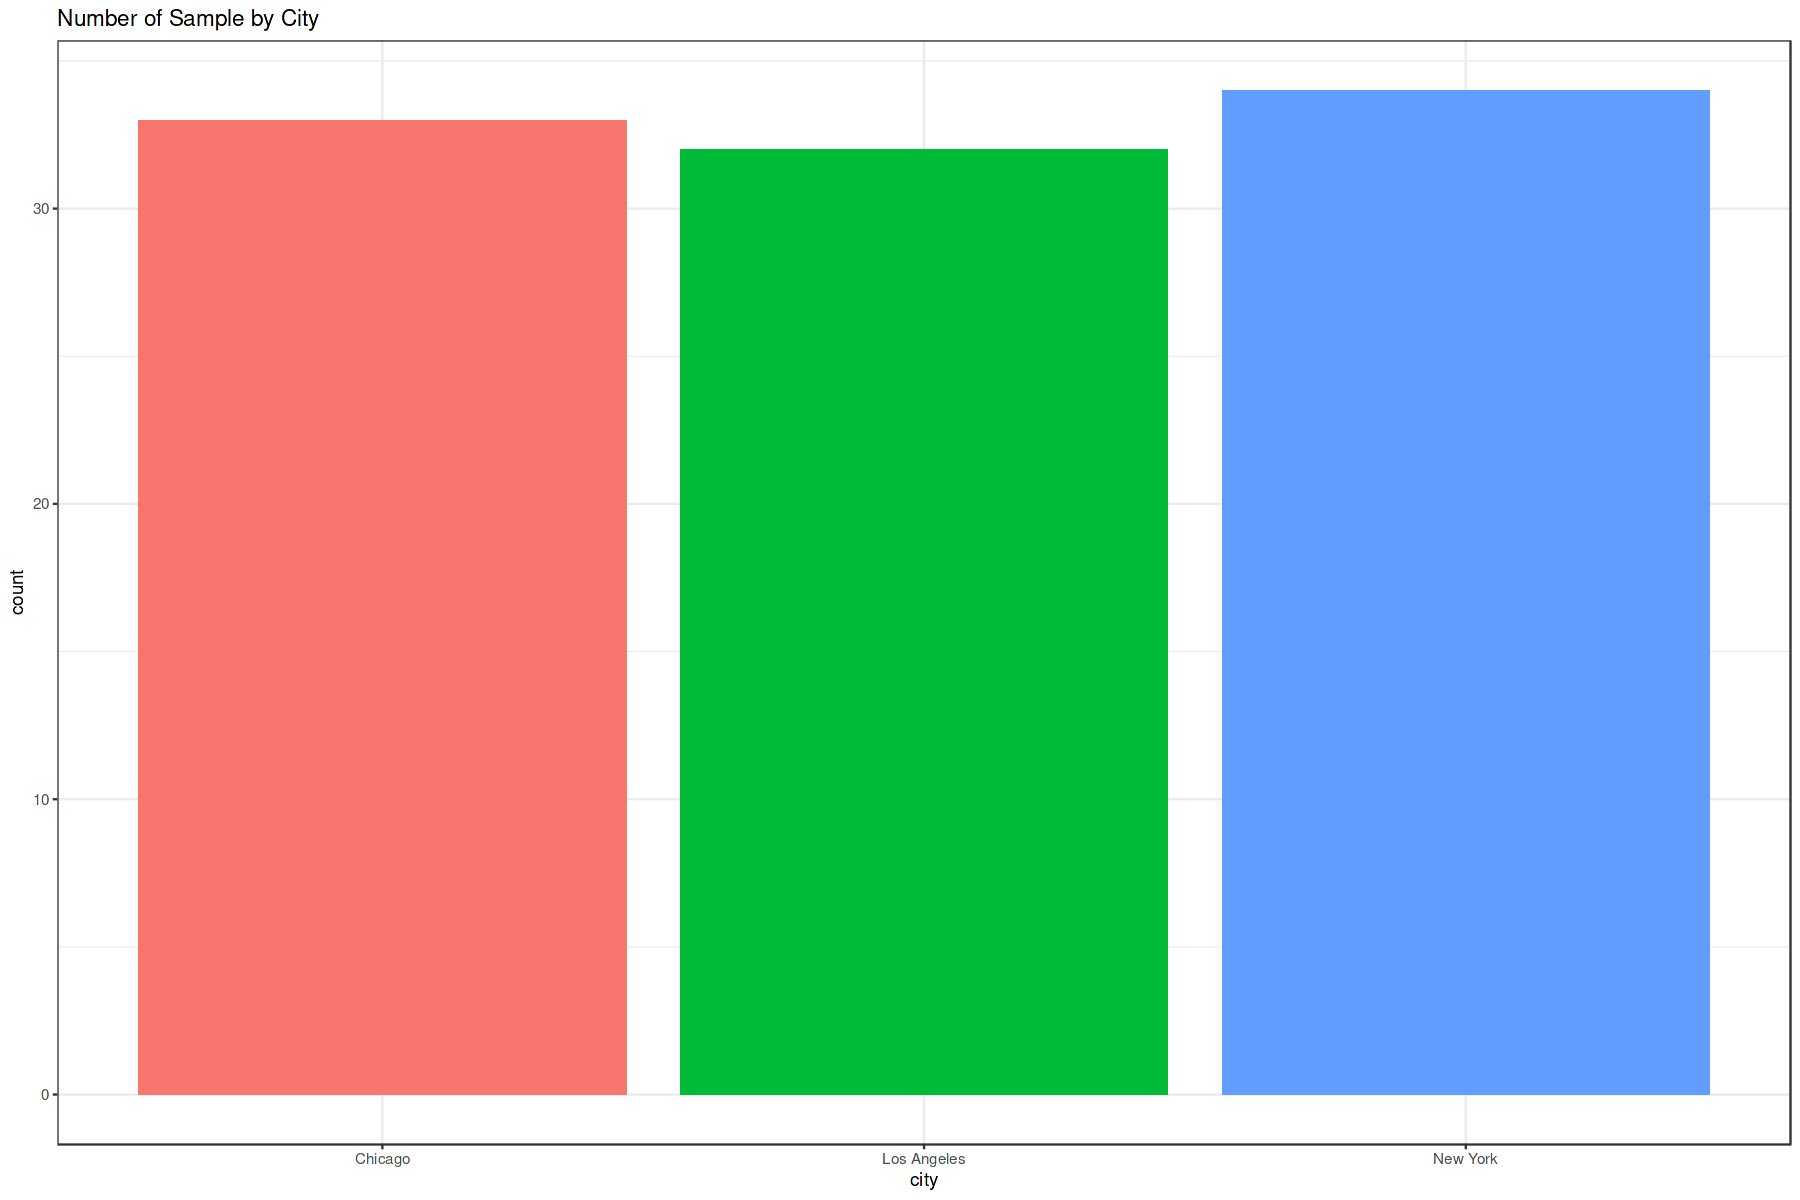

In [378]:
ggplot(data, aes(x=city, fill = city), alpha = 0.3) + geom_bar() + theme_bw() + 
                    theme(legend.position ='none') + ggtitle('Number of Sample by City')

-------------

**Average cpga by city**

In [379]:
city_avgcgpa <- data %>% group_by(city) %>% summarize(avg_cgpa = mean(cgpa, na.rm=T))

In [380]:
city_avgcgpa

city,avg_cgpa
<chr>,<dbl>
Chicago,6.015152
Los Angeles,5.806250
New York,6.073529


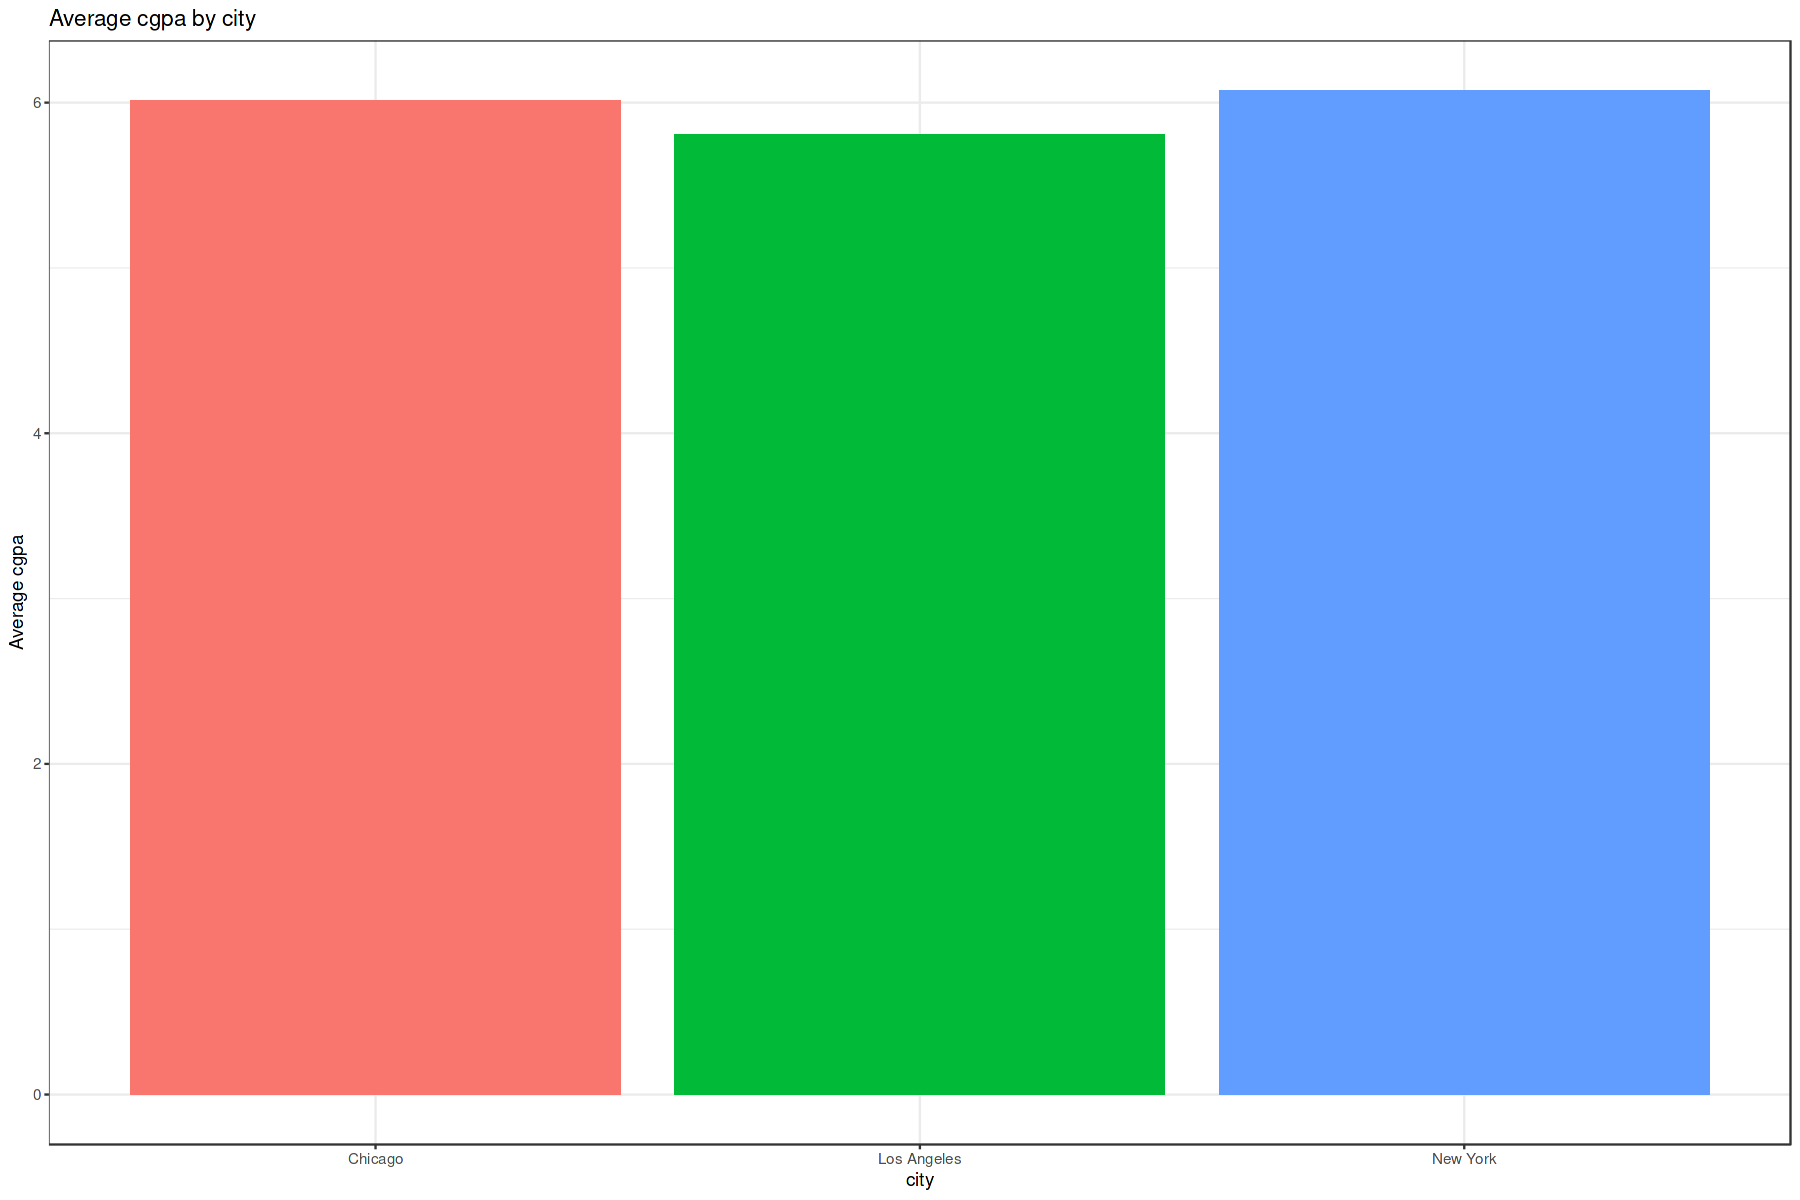

In [381]:
ggplot(city_avgcgpa, aes(x=city , y= avg_cgpa , fill = city)) + geom_col() + 
                    theme_bw() + theme(legend.position ='none') + ylab('Average cgpa')+
                        ggtitle('Average cgpa by city')

-----------

**Average iq by city**

In [382]:
city_avgiq <- data %>% group_by(city) %>% summarize(avg_iq = mean(iq, na.rm=T))

In [383]:
city_avgiq

city,avg_iq
<chr>,<dbl>
Chicago,124.7576
Los Angeles,114.8125
New York,118.1176


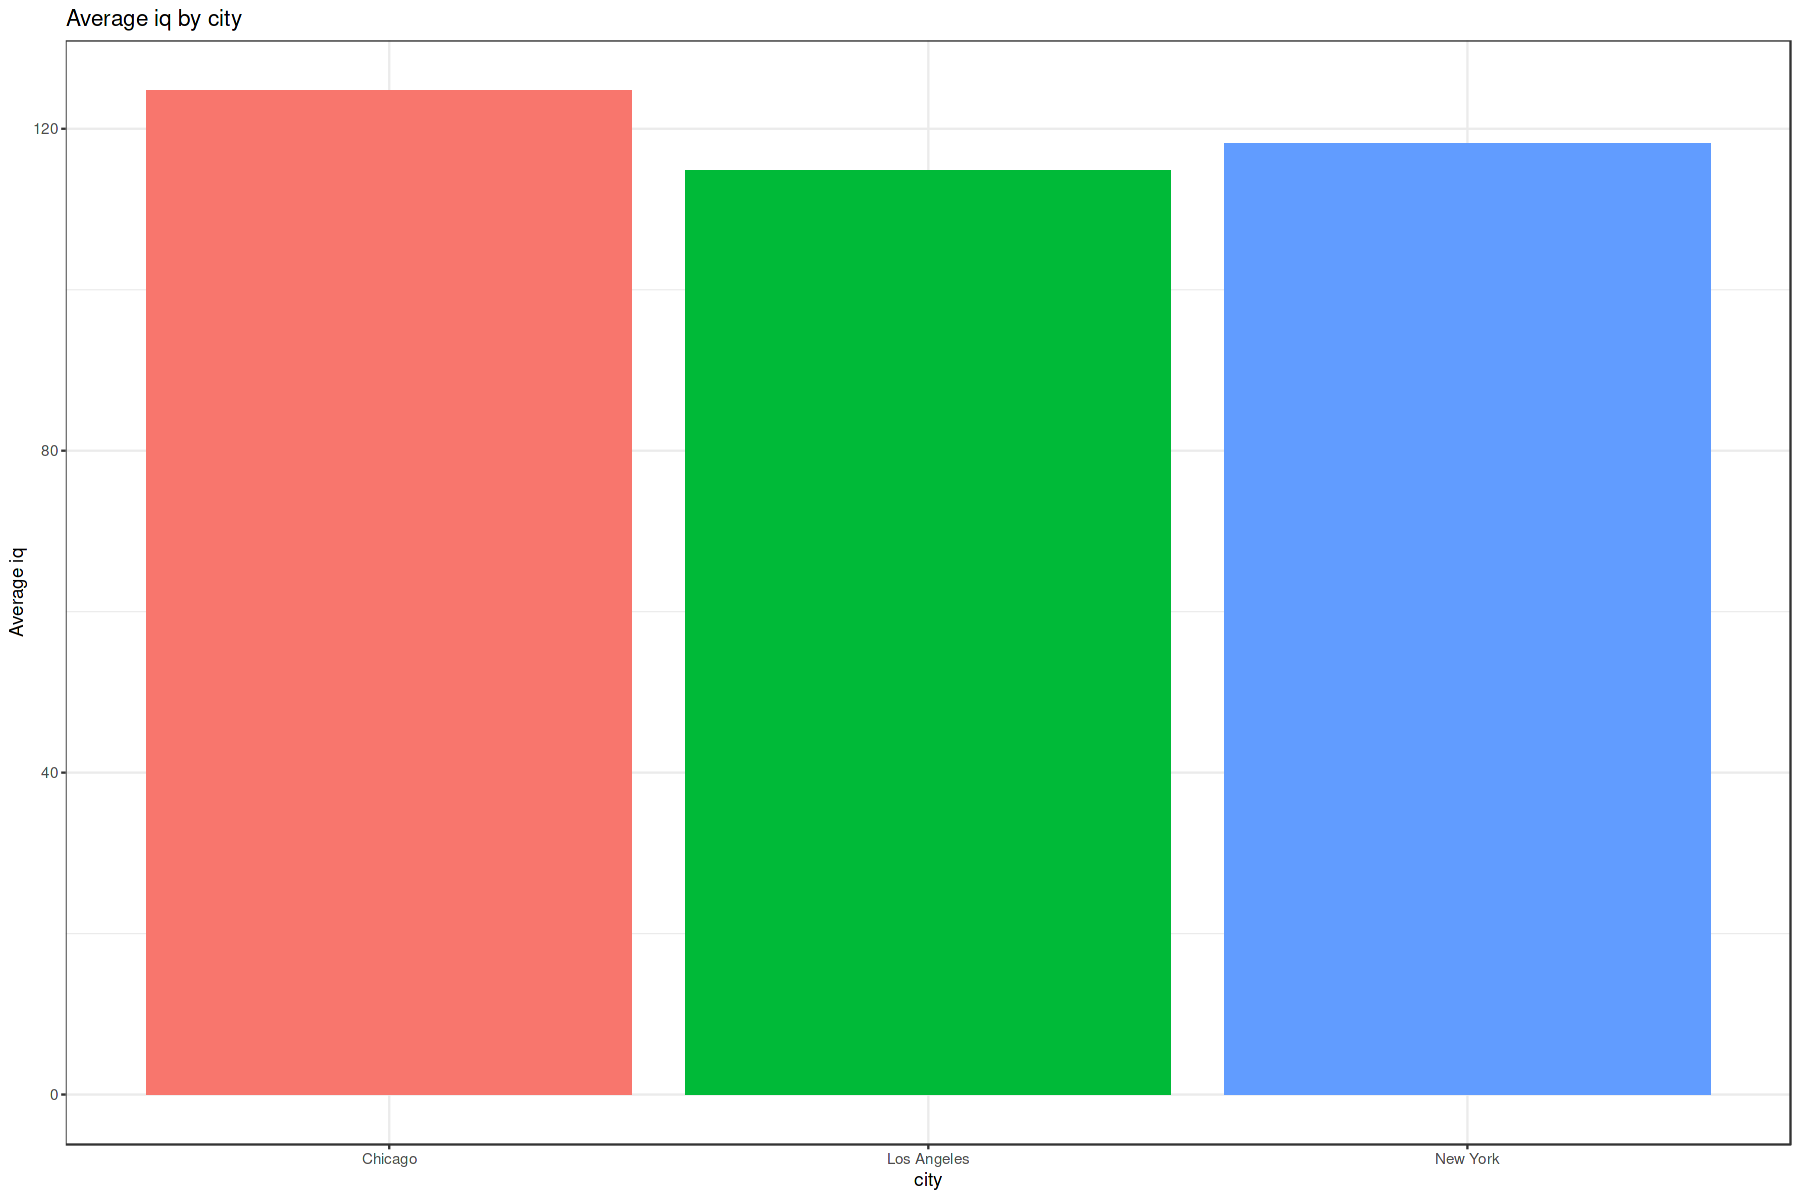

In [384]:
ggplot(city_avgiq, aes(x=city , y= avg_iq , fill = city)) + geom_col() + 
                    theme_bw() + theme(legend.position ='none') + ylab('Average iq')+
                        ggtitle('Average iq by city')

-------------

**placement by city**

In [385]:
city_placement<- data %>% group_by(city) %>% count(placement)

In [386]:
city_placement

city,placement,n
<chr>,<fct>,<int>
Chicago,0,18
Chicago,1,15
Los Angeles,0,19
Los Angeles,1,13
New York,0,16
New York,1,18


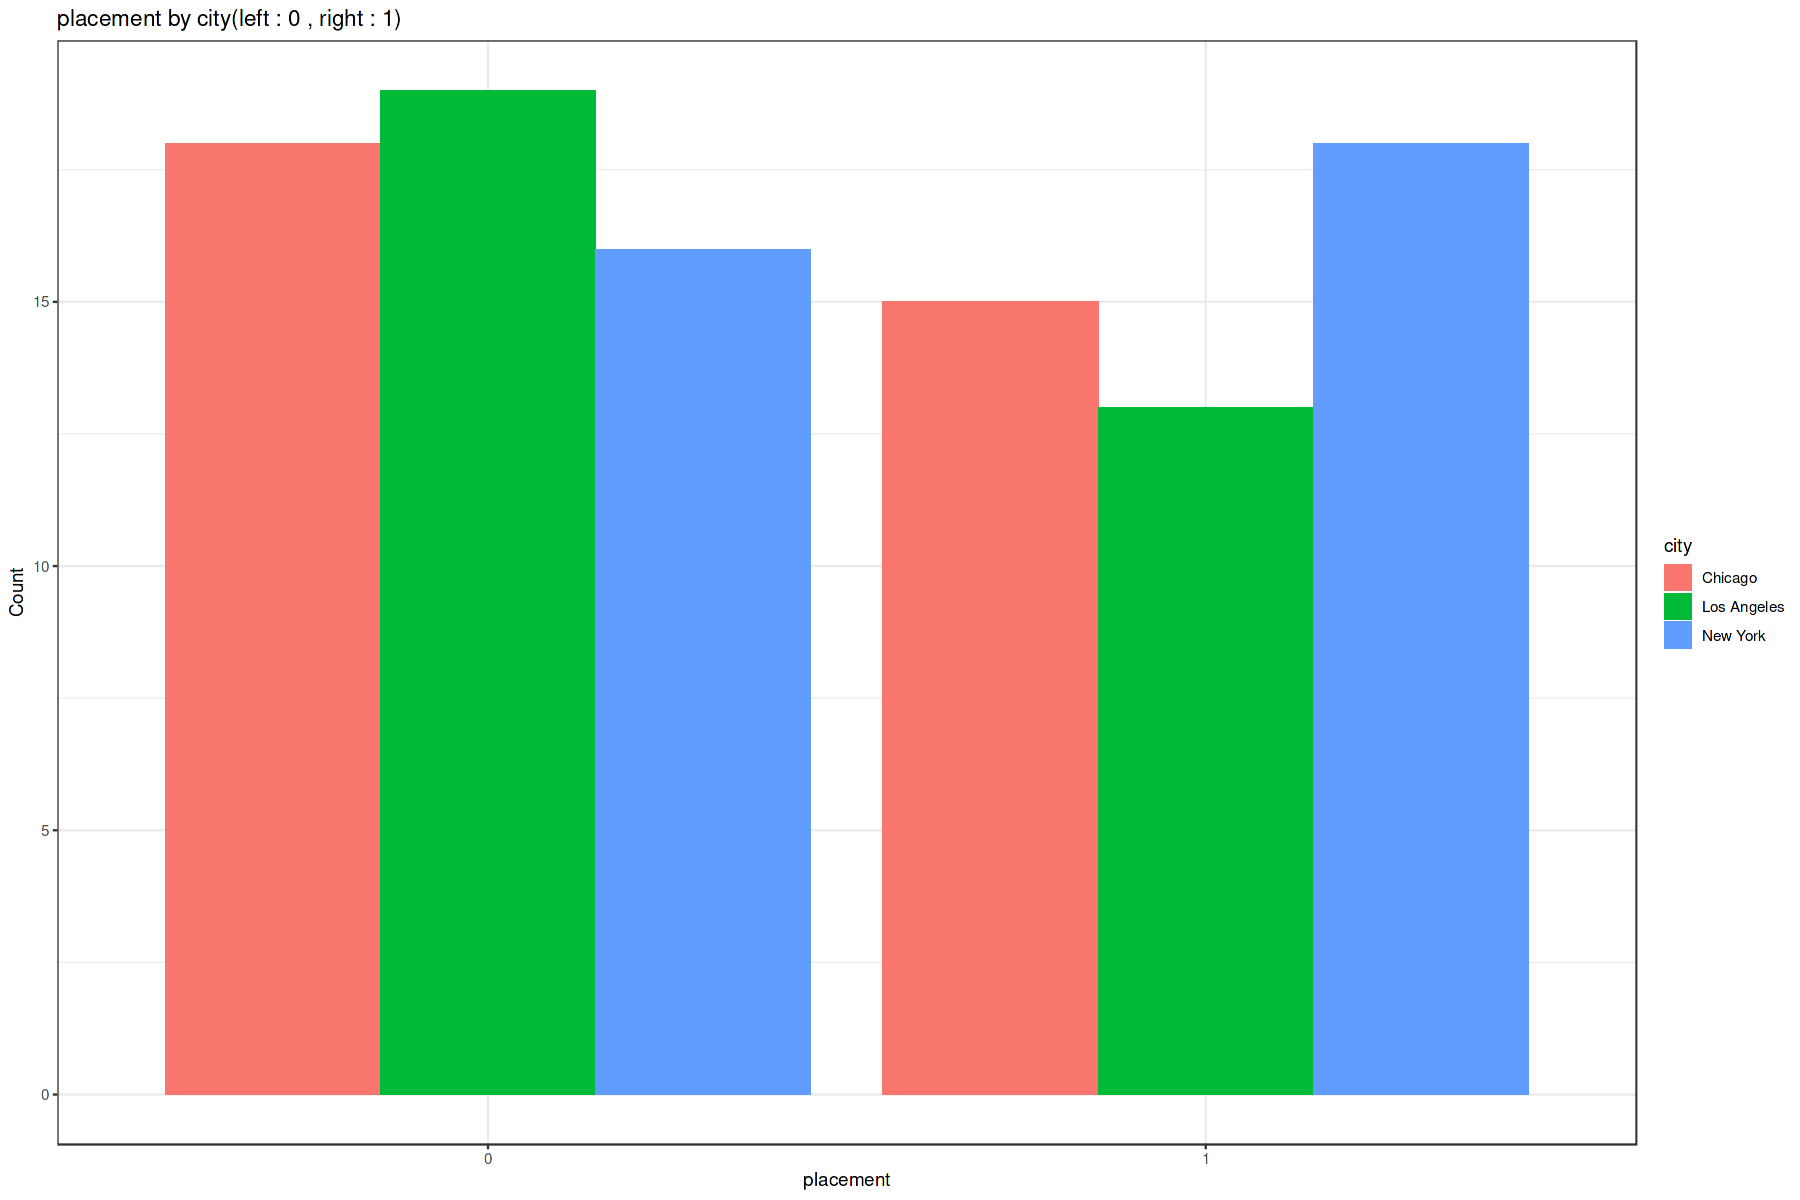

In [387]:
ggplot(city_placement, aes(x=placement, y= n,fill = city)) + geom_col(position = 'dodge') + theme_bw() + ylab('Count') +
                ggtitle('placement by city(left : 0 , right : 1)') 

------------

**iq vs cgpa scatterplot(by placement)**

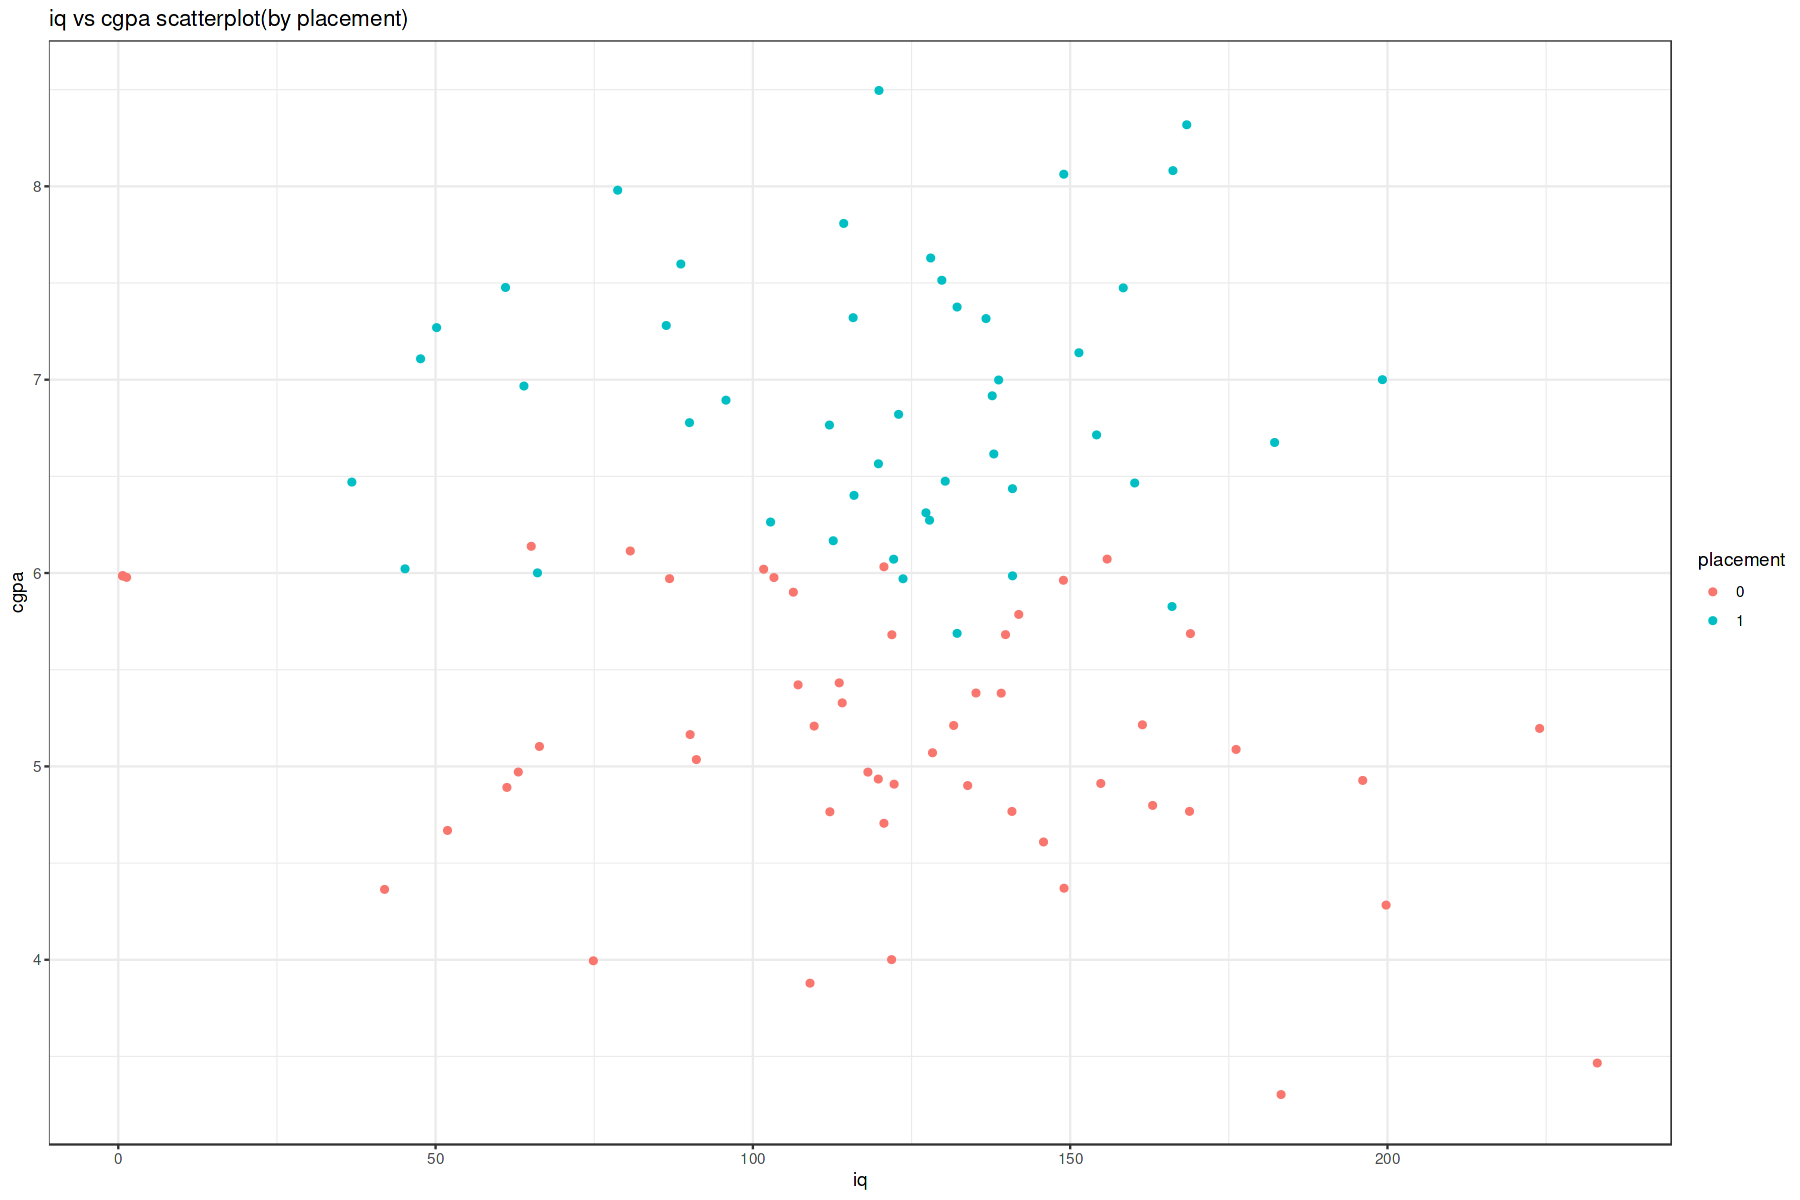

In [388]:
ggplot(data, aes(x= iq, y = cgpa, color = placement)) + geom_point(position= 'jitter') + theme_bw() + ggtitle('iq vs cgpa scatterplot(by placement)')

----------

# **4. Modeling**

In [389]:
library(randomForest)
library(caret)

**Logistic Regression**

In [390]:
LR <- glm(placement ~ iq + cgpa, data = data, family = 'binomial')

In [391]:
summary(LR)


Call:
glm(formula = placement ~ iq + cgpa, family = "binomial", data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.70677  -0.07224  -0.00063   0.05437   2.10942  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -45.83322   13.66951  -3.353 0.000800 ***
iq            0.01584    0.01080   1.466 0.142671    
cgpa          7.30393    2.21461   3.298 0.000974 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 136.748  on 98  degrees of freedom
Residual deviance:  32.118  on 96  degrees of freedom
AIC: 38.118

Number of Fisher Scoring iterations: 8


**iq is a statistically insignificant variable**

In [392]:
LR <- glm(placement ~ cgpa, data = data, family = 'binomial')

In [393]:
summary(LR)


Call:
glm(formula = placement ~ cgpa, family = "binomial", data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.31260  -0.07460  -0.00120   0.06581   2.24703  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -41.677     12.711  -3.279  0.00104 **
cgpa           6.884      2.102   3.274  0.00106 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 136.748  on 98  degrees of freedom
Residual deviance:  34.725  on 97  degrees of freedom
AIC: 38.725

Number of Fisher Scoring iterations: 8


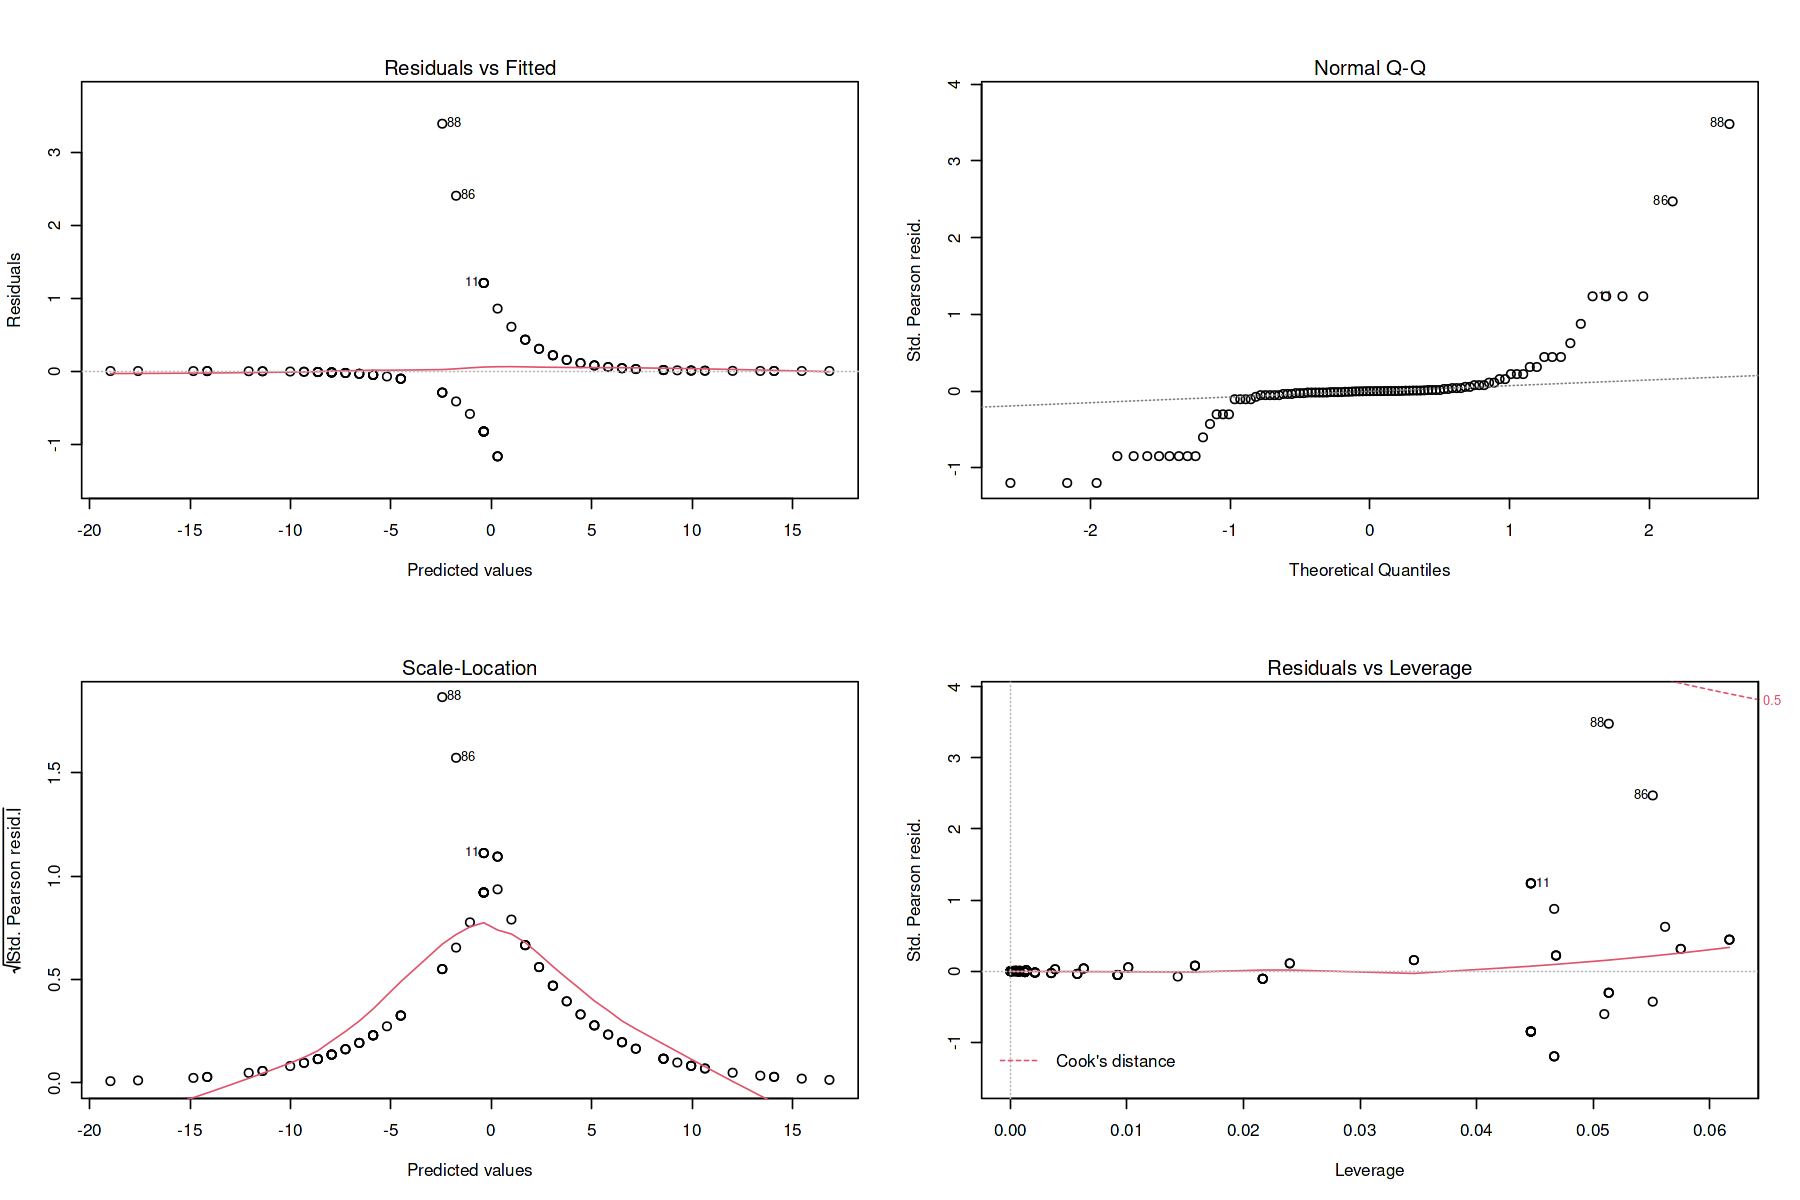

In [394]:
par(mfrow=c(2,2))
plot(LR)

In [395]:
pred <- round(predict(LR,data,type = "response"))

In [396]:
confusionMatrix(factor(pred), reference = data$placement)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 50  6
         1  3 40
                                          
               Accuracy : 0.9091          
                 95% CI : (0.8344, 0.9576)
    No Information Rate : 0.5354          
    P-Value [Acc > NIR] : 7.443e-16       
                                          
                  Kappa : 0.8165          
                                          
 Mcnemar's Test P-Value : 0.505           
                                          
            Sensitivity : 0.9434          
            Specificity : 0.8696          
         Pos Pred Value : 0.8929          
         Neg Pred Value : 0.9302          
             Prevalence : 0.5354          
         Detection Rate : 0.5051          
   Detection Prevalence : 0.5657          
      Balanced Accuracy : 0.9065          
                                          
       'Positive' Class : 0               
                                    

In [397]:
#Logistic Regression Accuracy
accuracy_LR <- confusionMatrix(factor(pred), reference = data$placement)$overall[1]
round(accuracy_LR,2)

Accuracy 
    0.91

--------------

In [398]:
RF <-  randomForest(placement ~., data = data, ntree=300)

In [399]:
pred_rf <- predict(RF,data)

In [400]:
confusionMatrix(factor(pred_rf), reference = data$placement)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 53  1
         1  0 45
                                         
               Accuracy : 0.9899         
                 95% CI : (0.945, 0.9997)
    No Information Rate : 0.5354         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.9797         
                                         
 Mcnemar's Test P-Value : 1              
                                         
            Sensitivity : 1.0000         
            Specificity : 0.9783         
         Pos Pred Value : 0.9815         
         Neg Pred Value : 1.0000         
             Prevalence : 0.5354         
         Detection Rate : 0.5354         
   Detection Prevalence : 0.5455         
      Balanced Accuracy : 0.9891         
                                         
       'Positive' Class : 0              
                                         

In [401]:
#Logistic Regression Accuracy
accuracy_RF <- confusionMatrix(factor(pred_rf), reference = data$placement)$overall[1]
round(accuracy_RF,2)

Accuracy 
    0.99

------------

# **5. Evaluation**

In [406]:
print(paste0('Logistic Regression Accuracy: ',round(accuracy_LR,2)))
print(paste0('RandomForest Accuracy: ',round(accuracy_RF,2)))

[1] "Logistic Regression Accuracy: 0.91"
[1] "RandomForest Accuracy: 0.99"


**Random forest is a better model, because it's more accuracy.**